In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.stats as stats

In [48]:
df = pd.read_csv("data/loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
maleAndYes = len(df[(df["Gender"]=="Male") & 
             (df["Loan_Status"]=="Y")])
male = len(df[(df["Gender"]=="Male")])
print(maleAndYes/male)
femaleAndYes = len(df[(df["Gender"]=="Female") & 
             (df["Loan_Status"]=="Y")])
female = len(df[(df["Gender"]=="Female")])
print(femaleAndYes/female)

0.6932515337423313
0.6696428571428571


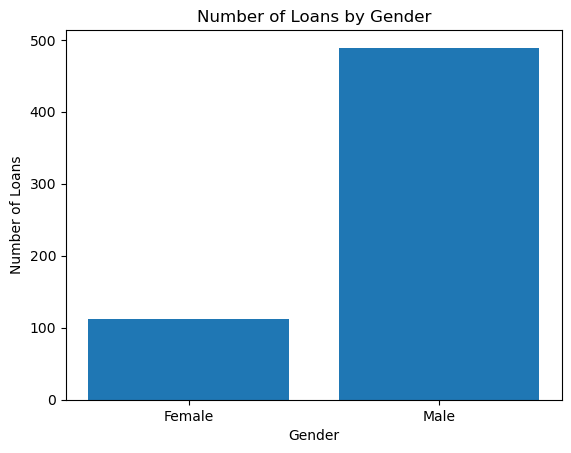

In [50]:
gender_counts = df.groupby('Gender')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

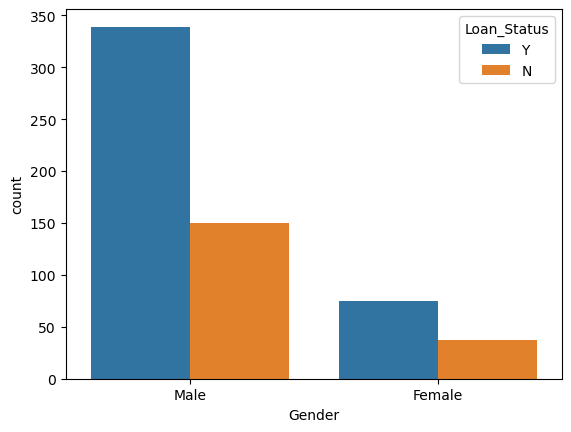

In [51]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)


In [52]:
yes = len(df[(df["Married"]=="Yes") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Married"]=="Yes")])
print("Married: " + str(yes/total))
yes = len(df[(df["Married"]=="No") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Married"]=="No")])
print("Unmarried: " + str(yes/total))

Married: 0.7160804020100503
Unmarried: 0.6291079812206573


<AxesSubplot:xlabel='Married', ylabel='count'>

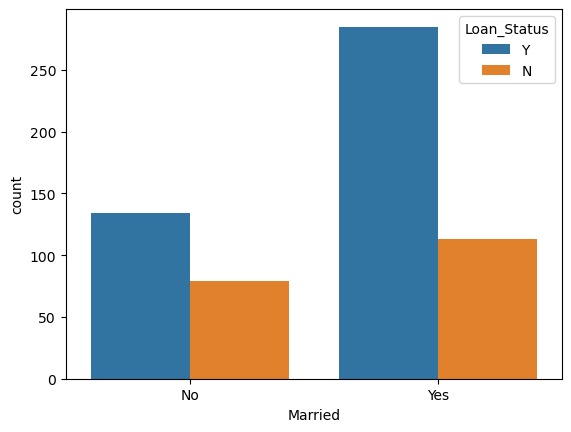

In [53]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

In [54]:
dependentsBigYes = len(df[(df['Dependents'] != "0") & 
             (df["Loan_Status"]=="Y")])
dependentsBig = len(df[(df['Dependents'] != "0")])
print(dependentsBigYes/dependentsBig)
dependentsSmallYes = len(df[(df['Dependents'] == "0") & 
             (df["Loan_Status"]=="Y")])
dependentsSmall = len(df[(df['Dependents'] == "0")])
print(dependentsSmallYes/dependentsSmall)

0.6840148698884758
0.6898550724637681


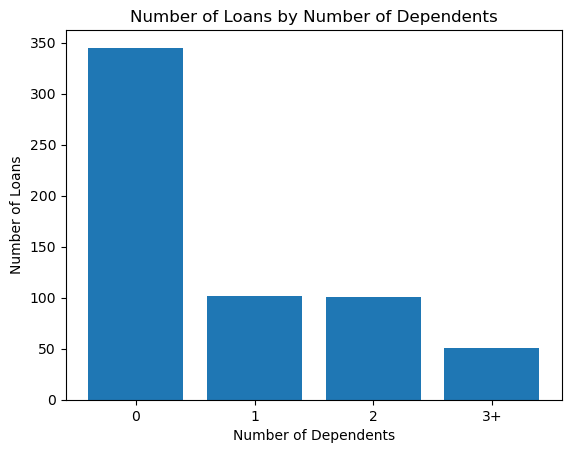

In [55]:
gender_counts = df.groupby('Dependents')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

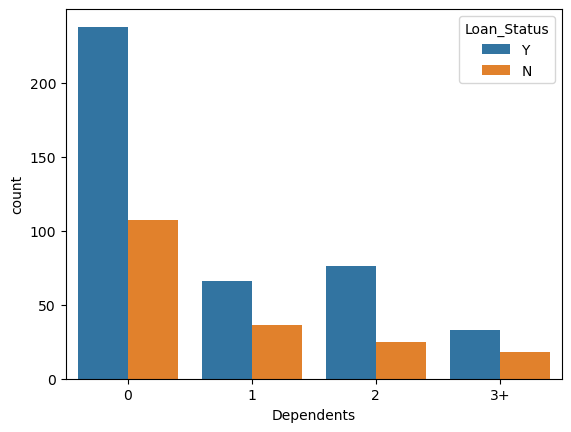

In [56]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [57]:
df["ApplicantIncome"].mean()

5403.459283387622

In [58]:
df["APZScores"] = stats.zscore(df["ApplicantIncome"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [59]:
yes = df[(df["APZScores"]<=0.01)& 
             (df["APZScores"]>=-0.01)]
yes

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.002218
141,LP001498,Male,No,0,Graduate,No,5417,0.0,168.0,360.0,1.0,Urban,Y,0.002218
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N,0.002218
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y,-0.002041


In [60]:
def bin(t):
  """return 'High' if the temperature is above the threshold, 'Low' otherwise"""
  if t < -1.5:
    return "Very Low"
  if t < -0.5:
    return "Low"
  if t < .5:
    return "Middle"
  if t < 1.5:
    return "High"
  else:
    return "Very High"

In [61]:
# no code needs to be changed in this block
df['ApplicantIncome'] = df.apply(lambda row : bin(row['APZScores']), axis = 1)
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,Middle,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Middle,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Middle,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Middle,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,Middle,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Middle,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Middle,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,Middle,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,Middle,0.0,187.0,360.0,1.0,Urban,Y,0.357064


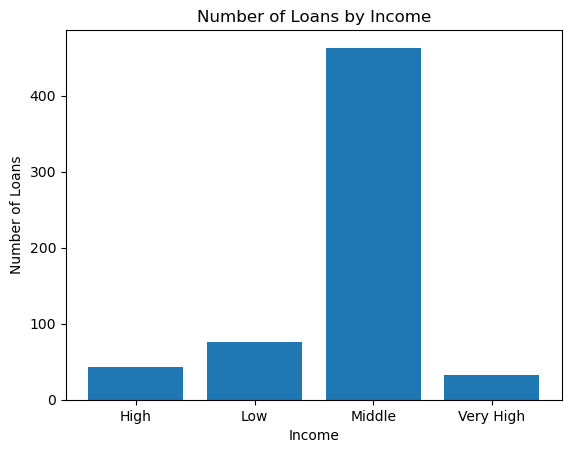

In [62]:
gender_counts = df.groupby('ApplicantIncome')['Loan_Status'].count()

plt.bar(gender_counts.index, gender_counts.values)
plt.title("Number of Loans by Income")
plt.xlabel("Income")
plt.ylabel("Number of Loans")
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

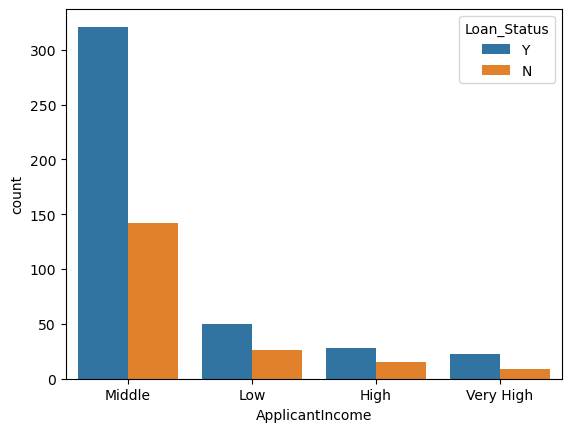

In [63]:
sns.countplot(x='ApplicantIncome', hue='Loan_Status', data=df)

In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,Middle,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Middle,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Middle,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Middle,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,Middle,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Middle,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Middle,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,Middle,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,Middle,0.0,187.0,360.0,1.0,Urban,Y,0.357064


In [65]:
# yes = len(df[(df["ApplicantIncome"]=="Very Low") & 
#              (df["Loan_Status"]=="Y")])
# total = len(df[(df["ApplicantIncome"]=="Very Low")])
# print(yes/total)
yes = len(df[(df["ApplicantIncome"]=="Low") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Low")])
print("Low: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="Middle") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Middle")])
print("Middle: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="High") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="High")])
print("High: " + str(yes/total))
yes = len(df[(df["ApplicantIncome"]=="Very High") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["ApplicantIncome"]=="Very High")])
print("Very High: " + str(yes/total))

Low: 0.6578947368421053
Middle: 0.693304535637149
High: 0.6511627906976745
Very High: 0.71875


In [66]:
yes = len(df[df["Loan_Status"]=="Y"])
total = len(df)
print("Average Likelihood of Getting a Loan: " + str(yes/total))

Average Likelihood of Getting a Loan: 0.6872964169381107


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

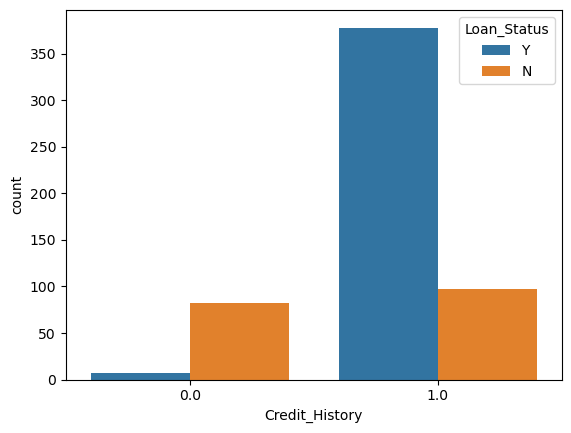

In [67]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

In [68]:
yes = len(df[(df["Credit_History"]==1) & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Credit_History"]==1)])
print("CH=1: " + str(yes/total))
yes = len(df[(df["Credit_History"]==0) & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Credit_History"]==0)])
print("CH=0: " + str(yes/total))

CH=1: 0.7957894736842105
CH=0: 0.07865168539325842


In [69]:
yes = len(df[(df["Self_Employed"]=="Yes") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Self_Employed"]=="Yes")])
print("Self Employed: " + str(yes/total))
yes = len(df[(df["Self_Employed"]=="No") & 
             (df["Loan_Status"]=="Y")])
total = len(df[(df["Self_Employed"]=="No")])
print("Employed: " + str(yes/total))

Self Employed: 0.6829268292682927
Employed: 0.686


In [70]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,APZScores
0,LP001002,Male,No,0,Graduate,No,Middle,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,Middle,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,Middle,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,Middle,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,Middle,0.0,141.0,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Middle,0.0,71.0,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,Middle,0.0,40.0,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,Middle,240.0,253.0,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,Middle,0.0,187.0,360.0,1.0,Urban,Y,0.357064


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

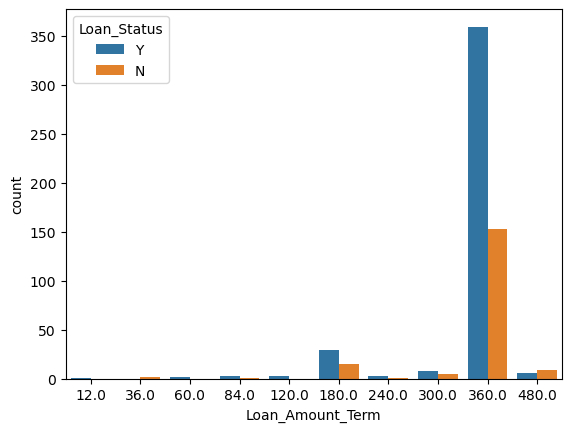

In [71]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

In [72]:
import math

def isSquare(a):
    b = math.sqrt(a)
    return math.isclose(b, int(b))

def sum_odd_squares(start, end):
    b = 0
    for x in range(start, end + 1):
        if isSquare(x) and x%2 != 0:
            b += x
    return b

sum_odd_squares(9, 10201)

176850

In [73]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score
from sklearn import preprocessing

In [74]:
# importing data
df = pd.read_csv("data/loan_sanction_train.csv")
df.drop('Loan_ID', inplace=True, axis=1)
  
print(df.head())
  
print(df.columns)

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [75]:
#data cleaning

def alter(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [76]:
#marriage cleaning
df['Married'] = df.apply(lambda row : alter(row['Married']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [77]:
df['Self_Employed'] = df.apply(lambda row : alter(row['Self_Employed']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [78]:
#Gender alter cleaning
def alter(x):
    if x == "Male":
        return 1
    else:
        return 0

In [79]:
df['Gender'] = df.apply(lambda row : alter(row['Gender']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [80]:
#Education alter cleaning
def alter(x):
    if x == "Graduate":
        return 1
    else:
        return 0

In [81]:
df['Education'] = df.apply(lambda row : alter(row['Education']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [82]:
#Property alter cleaning
def alter(x):
    if x == "Urban":
        return 2
    if x == "Semiurban":
        return 1
    else:
        return 0

In [83]:
df['Property_Area'] = df.apply(lambda row : alter(row['Property_Area']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


In [84]:
#Property alter cleaning
def alter(x):
    if x == "1":
        return 1
    if x == "2":
        return 2
    else:
        return 3

In [85]:
df['Dependents'] = df.apply(lambda row : alter(row['Dependents']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,3,1,0,5849,0.0,NaN,360.0,1.0,2,Y
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,3,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,3,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,3,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,3,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


In [86]:
#Property alter cleaning
def alter(x):
    if x == "Y":
        return 1
    if x == "N":
        return 0

In [87]:
df['Loan_Status'] = df.apply(lambda row : alter(row['Loan_Status']), axis = 1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,3,1,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,3,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,3,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,3,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,3,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [88]:
df = df.fillna(0)
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
# creating feature variables
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           3          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           3          1              1             3000   
3         1        1           3          0              0             2583   
4         1        0           3          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           3          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           3          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [91]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

def myRound(x):
    if x < .6:
        return 0
    else:
        return 1
  
# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(X_train, y_train)
  
# making predictions
predictions = model.predict(X_test)

predictions = [myRound(x) for x in predictions]

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


print('accuracy : ', accuracy_score(y_test, predictions))
print('precision : ', precision_score(y_test, predictions))
print('recall : ', recall_score(y_test, predictions))

mean_squared_error :  0.2601626016260163
mean_absolute_error :  0.2601626016260163
accuracy :  0.7398373983739838
precision :  0.7555555555555555
recall :  0.8717948717948718
